In [ ]:

import zipfile
import os

# Path to the ZIP file
zip_file_path = "/content/archive (2).zip"

# Extract files to the current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        # Avoid creating subdirectories by extracting files directly
        if not os.path.basename(file):  # Skip directories
            continue
        with open(os.path.basename(file), "wb") as output_file:
            output_file.write(zip_ref.read(file))

print("Files extracted without creating directories.")

Files extracted without creating directories.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


df = pd.read_csv("/content/Student_Performance.csv")

df.head()



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# Check for missing values
print(df.isna().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [ ]:
# Check data types and column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# Define features and target variable
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].values  # Features (2D)
y = df['Performance Index'].values.reshape(-1, 1)  # Target (reshape to column vector)

In [ ]:
X

array([[ 0.77518771,  1.70417565,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245,  0.86650484, -1.24975394]])

In [ ]:
y

array([[91.],
       [65.],
       [45.],
       ...,
       [74.],
       [95.],
       [64.]])

In [ ]:
# Standardize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [ ]:
X

array([[ 0.77518771,  1.70417565,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245,  0.86650484, -1.24975394]])

In [ ]:

# Add bias term (column of ones) to X
m = len(y)  # Number of training examples
X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 for theta_0 (bias term)

In [ ]:
# Initialize parameters (theta values)
theta = np.zeros((X_b.shape[1], 1))  # The number of parameters

# Define learning rate and iterations
learning_rate = 0.01
iterations = 1000



# COST FUNC

In [ ]:
# Define gradient descent function
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

# Gradient descnet

In [ ]:
def gradient_descent(X_b, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (1/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X_b, y, theta))

    return theta, cost_history

In [ ]:
learning_rate

0.01

In [ ]:
theta_optimal, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

In [ ]:
theta_optimal

array([[55.22241588],
       [ 7.38761619],
       [17.66375488],
       [ 0.80777043],
       [ 0.55977723]])

In [ ]:
cost_history

[167548236918.19464,
 164220784848.2266,
 160959501239.60196,
 157763070241.30725,
 154630202170.81363,
 151559632993.6424,
 148550123813.28046,
 145600460371.24146,
 142709452557.0694,
 139875933928.08774,
 137098761238.69986,
 134376813979.05133,
 131708993922.86717,
 129094224684.28197,
 126531451283.48418,
 124019639720.99875,
 121557776560.43695,
 119144868519.54434,
 116779942069.38235,
 114462043041.48128,
 112190236242.80663,
 109963605078.38289,
 107781251181.42278,
 105642294050.81276,
 103545870695.80804,
 101491135287.79433,
 99477258818.97511,
 97503428767.84724,
 95568848771.32979,
 93672738303.41309,
 91814332360.19969,
 89992881151.20862,
 88207649796.81934,
 86457918031.73293,
 84742979914.33087,
 83062143541.8143,
 81414730771.00827,
 79800076944.71901,
 78217530623.53326,
 76666453322.9518,
 75146219255.75041,
 73656215079.46544,
 72195839648.90082,
 70764503773.55754,
 69361629979.88734,
 67986652278.27449,
 66639015934.652176,
 65318177246.66064,
 64023603324.25728

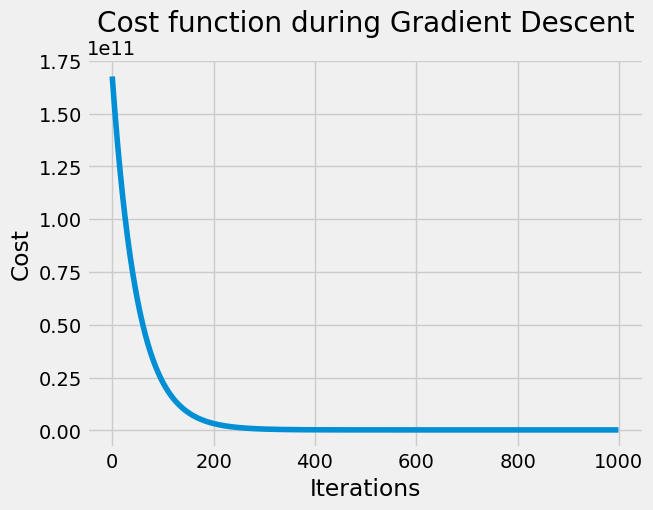

In [ ]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function during Gradient Descent")
plt.show()


In [ ]:

predictions = X_b.dot(theta_optimal)

In [ ]:
# Evaluating the model
mae = metrics.mean_absolute_error(y, predictions)
mse = metrics.mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.6375961917977253
Mean Squared Error (MSE): 4.245182629818951
Root Mean Squared Error (RMSE): 2.060384097642707


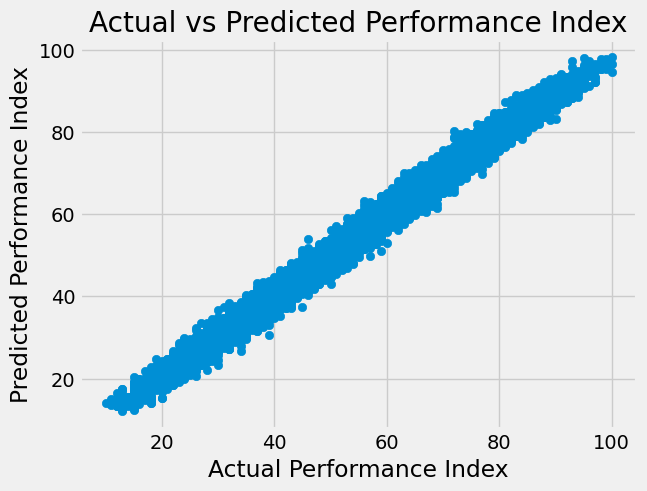

In [ ]:
# Plotting the actual vs predicted values
plt.scatter(y, predictions)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()


**ploynomial**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split



# Define features and target variable
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].values  # Features
y = df['Performance Index'].values.reshape(-1, 1)  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data (optional but helps with convergence)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)



In [ ]:
# Apply PolynomialFeatures with degree=3
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)  # Apply to training data
X_poly_test = poly.transform(X_test)  # Apply to test data





In [ ]:
# Initialize parameters (theta values)
theta = np.zeros((X_poly_train.shape[1], 1))

# Gradient Descent Hyperparameters
learning_rate = 0.01
iterations = 1000
m = len(X_poly_train)



# cost func

In [ ]:
# Cost function (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost




# gradient desc

In [ ]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Calculate predictions
        predictions = X.dot(theta)

        # Compute the gradient
        gradients = (1/m) * X.T.dot(predictions - y)

        # Update parameters (theta)
        theta = theta - learning_rate * gradients

        # Calculate and record the cost for the current iteration
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history



In [ ]:
# Train the model using gradient descent
theta, cost_history = gradient_descent(X_poly_train, y_train, theta, learning_rate, iterations)



In [ ]:
# Print the learned parameters (theta values)
print("Learned theta values (intercept and coefficients):")
print(theta)

Learned theta values (intercept and coefficients):
[[ 4.31095437e+01]
 [ 4.45986732e+00]
 [ 1.05438876e+01]
 [ 5.09221548e-01]
 [ 4.17500964e-01]
 [ 2.59510608e+00]
 [ 9.58968176e-02]
 [-4.55991295e-02]
 [-1.02019596e-01]
 [ 2.60103213e+00]
 [ 8.81288329e-03]
 [ 1.23737645e-02]
 [ 2.87090155e+00]
 [ 1.82701442e-02]
 [ 2.52125056e+00]
 [ 7.87834341e-01]
 [ 9.35561491e-01]
 [-7.70789395e-02]
 [-7.33536664e-02]
 [ 5.21751909e-01]
 [ 1.00247943e-01]
 [ 2.24164300e-02]
 [ 4.26597108e-01]
 [ 9.92315428e-04]
 [ 3.85120003e-01]
 [ 2.09781826e+00]
 [ 2.43229089e-02]
 [ 3.68222268e-02]
 [ 9.87292456e-01]
 [ 3.75239626e-02]
 [ 8.48647393e-01]
 [ 1.69565052e-01]
 [-1.22028112e-02]
 [ 6.46342545e-02]
 [ 1.52021295e-01]]


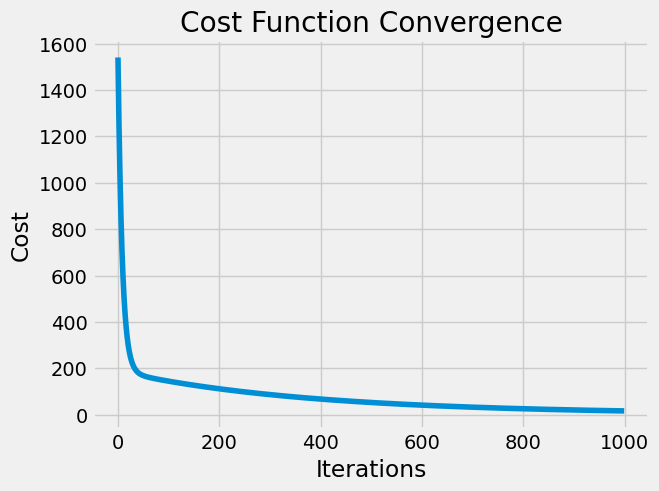

In [ ]:
# Plotting the cost function history to visualize convergence
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()



In [ ]:
# Predictions on the test set
y_train_pred = X_poly_train.dot(theta)
y_test_pred = X_poly_test.dot(theta)

# Evaluate the model
mse_train = np.mean((y_train_pred - y_train)**2)  # Mean Squared Error for training
mse_test = np.mean((y_test_pred - y_test)**2)  # Mean Squared Error for testing
rmse_train = np.sqrt(mse_train)  # Root Mean Squared Error for training
rmse_test = np.sqrt(mse_test)  # Root Mean Squared Error for testing
print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Training Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")

Training Mean Squared Error (MSE): 33.12873950849914
Test Mean Squared Error (MSE): 32.517873672664656
Training Root Mean Squared Error (RMSE): 5.75575707518126
Test Root Mean Squared Error (RMSE): 5.702444534817034


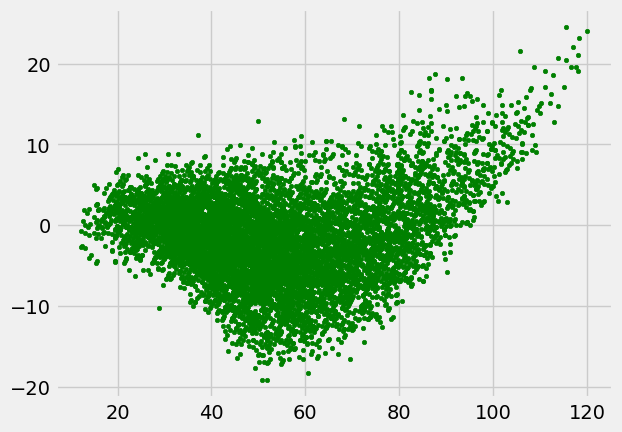

In [ ]:


# Plotting the residuals for the training set
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    color="green",
    s=10,
    label="Train data"
)



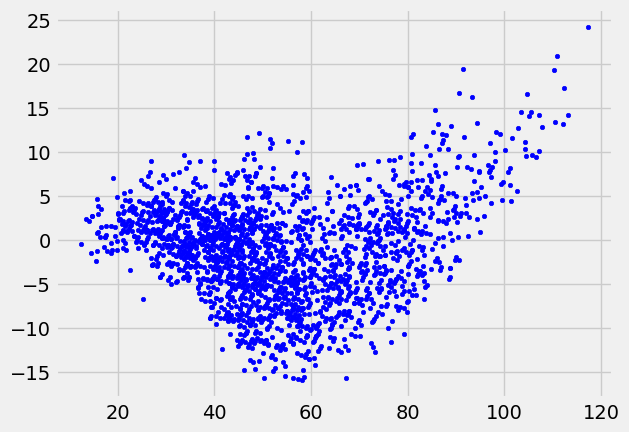

In [ ]:
# Plotting the residuals for the test set
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    color="blue",
    s=10,
    label="Test data"
)



<ipython-input-52-4d8b2c26d035>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


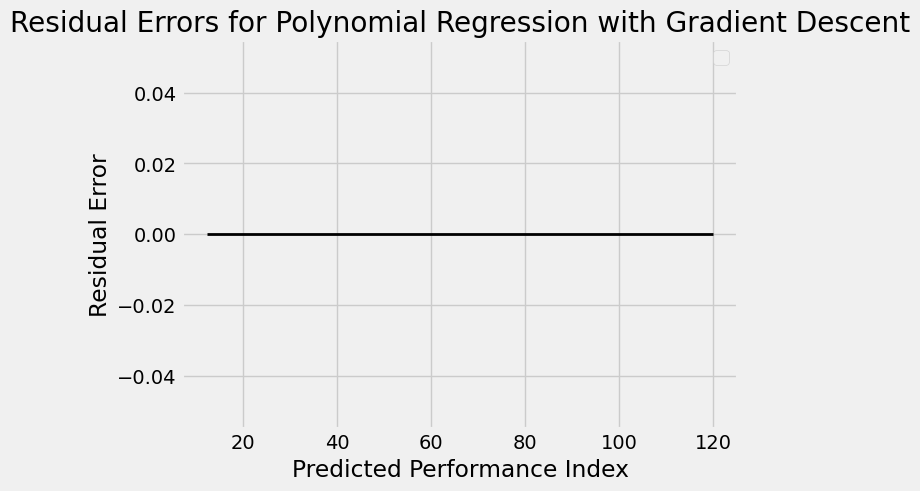

In [ ]:
# Plot a horizontal line at y = 0 to indicate zero residual error
plt.hlines(
    y=0,
    xmin=min(y_train_pred.min(), y_test_pred.min()),
    xmax=max(y_train_pred.max(), y_test_pred.max()),
    linewidth=2,
    color="black"
)
# Add title, labels, and legend
plt.title("Residual Errors for Polynomial Regression with Gradient Descent")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residual Error")
plt.legend(loc="upper right")

# Display the plot
plt.show()
